# Building Portfolios from Synthetic Assets

In [96]:
################
# Import dependencies
################
import numpy as np
import matplotlib.pyplot as plt
#import correlations as corr
import distcorr as corr
import pandas as pd
import os
import glob
#import portfolio analysis
import portfolio_assess as pa
#import data

In [ ]:
##################
# Define global variables
##################
L = 20 #lookback window
rebalance = 5 #rebalancing frequency
# load in data
# TEMPORARY: Default data for testing
#from clustering import ETFs
# Path to the 'Yearly' directory
data_root = "Data/CRSP/Yearly"
START_YEAR = 2000
END_YEAR = 2001
def load_gzipped_data(data_root):
    """
    Loads all .csv.gz daily files from Yearly/2000 through Yearly/2015.
    Extracts the date from the filename and adds it as a column.
    """
    all_files = []
    for year in range(START_YEAR, END_YEAR + 1):
        pattern = os.path.join(data_root, str(year), "*.csv.gz")
        files = sorted(glob.glob(pattern))
        
        for f in files:
            try:
                df_day = pd.read_csv(f, compression='gzip')
                date_str = os.path.basename(f).replace(".csv.gz", "")
                df_day["date"] = pd.to_datetime(date_str, format="%Y%m%d")
                all_files.append(df_day)
            except Exception as e:
                print(f"Skipping {f}: {e}")

    df = pd.concat(all_files, ignore_index=True)
    return df

df = load_gzipped_data("Data/CRSP/Yearly")
# Set up
# Step 1: Combine tickers + SPY in one DataFrame

tickers = ['XLF', 'XLB', 'XLK', 'XLY', 'XLP', 'XLI']
df_filtered = df[df['ticker'].isin(tickers + ['SPY']) & 
                 (df['date'] >= "2000-01-03") & 
                 (df['date'] <= "2000-06-01")]

ticker_to_check = 'GE'
if ticker_to_check in df['ticker'].unique():
    print(f"{ticker_to_check} is in the data")
else:
    print(f"{ticker_to_check} is NOT in the data")

pivot_data = df_filtered.pivot(index='date', columns='ticker', values='prevAdjClose')

# Step 2: Drop rows with any NaNs to ensure full alignment
pivot_data = pivot_data.dropna()

# Step 3: Compute log returns using the natural log of price ratios
returns_all = np.log(pivot_data / pivot_data.shift(1)).dropna()
# print(returns_all)
# Step 4: Separate tickers and market
returns = returns_all[tickers].to_numpy()
ret_mkt = returns_all['SPY'].to_numpy().reshape(-1, 1)

# Now both are aligned
print(returns.shape, ret_mkt.shape)  # Both should be (N, k) and (N, 1)


GE is in the data
ticker           SPY       XLB       XLF       XLI       XLK       XLP  \
date                                                                     
2000-01-04 -0.009784 -0.023217 -0.038161 -0.026349  0.028542 -0.012233   
2000-01-05 -0.039909 -0.009673 -0.044690 -0.027775 -0.052015 -0.028535   
2000-01-06  0.001787  0.040386 -0.008261 -0.004645 -0.015124  0.017485   
2000-01-07 -0.016202  0.025439  0.043289  0.013519 -0.033542  0.018495   
2000-01-10  0.056452 -0.000728  0.016196  0.037452  0.017206  0.061753   
...              ...       ...       ...       ...       ...       ...   
2000-05-25  0.016173 -0.004396  0.012493  0.014354  0.038593  0.021631   
2000-05-26 -0.017333 -0.037249 -0.025554 -0.018148 -0.016449 -0.002885   
2000-05-30  0.001160 -0.015669 -0.003704 -0.005544  0.003396  0.003296   
2000-05-31  0.033631  0.011086  0.020409  0.017907  0.062829 -0.005776   
2000-06-01  0.000630 -0.008766  0.012048  0.006803 -0.019492 -0.009561   

ticker           XL

Assets returns shape: (100, 6)
Market return shape: (100, 1)


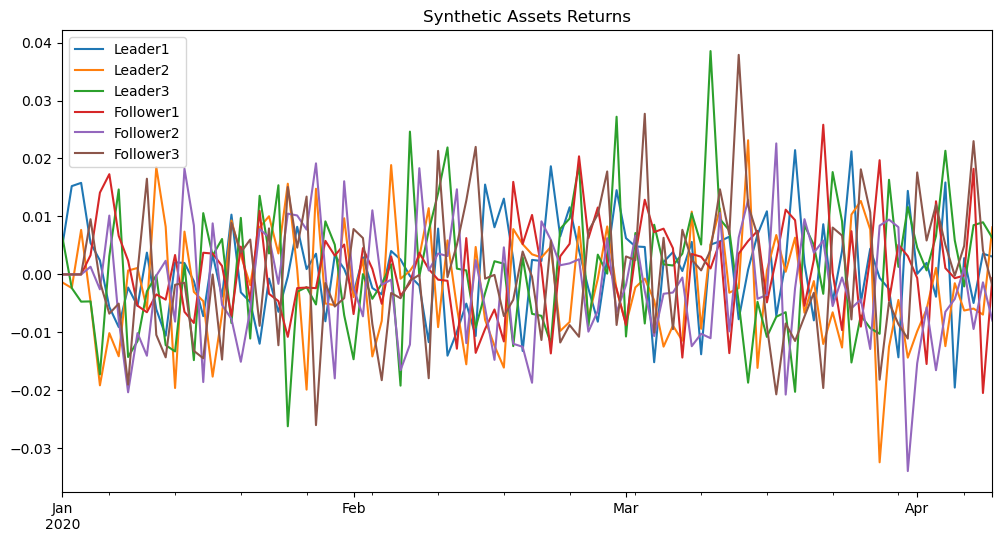

,Unnamed: 0,ticker,open,high,low,close,volume,OPCL,pvCLCL,prevAdjClose,SPpvCLCL,sharesOut,PERMNO,SICCD,PERMCO,prevRawOpen,prevRawClose,prevAdjOpen,date
0,1,SPY,148.25000,148.25000,143.87500,145.43750,8164299,-0.019154,-0.009787,146.87,-0.009549,27109,84398,6726,46699,146.84375,146.87500,146.84,2000-01-03
1,2,XLF,23.71875,23.71875,22.71875,22.87500,963200,-0.036221,-0.037475,23.77,-0.009549,17000,86455,6726,34957,24.00000,23.76563,24.00,2000-01-03
2,3,XLB,26.67188,26.68750,25.93750,25.96875,140500,-0.026716,-0.022928,26.58,-0.009549,5250,86449,6726,34957,26.00000,26.57813,26.01,2000-01-03
3,4,XLK,55.62500,55.62500,53.50000,55.43750,938100,-0.003376,0.029002,53.88,-0.009549,20000,86457,6726,34957,54.15625,53.87500,54.16,2000-01-03
4,5,XLV,31.00000,31.00000,30.06250,30.29688,246700,-0.022942,-0.019221,30.89,-0.009549,2800,86451,6726,34957,30.59375,30.89063,30.60,2000-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1527441,2990,ZMX,6.50000,6.50000,6.45000,6.45000,1800,-0.007722,0.000000,6.45,-0.011145,8191,20917,1459,21956,6.52000,6.45000,6.52,2001-12-31
1527442,2991,ZNH,14.29000,14.30000,14.11000,14.30000,7400,0.000700,-0.006254,14.39,-0.011145,1651,85235,4512,32026,14.40000,14.39000,14.40,2001-12-31
1527443,2992,ZNT,28.06500,28.06500,27.90000,27.94000,9700,-0.004464,-0.007460,28.15,-0.011145,17532,84073,6331,5058,29.10000,28.15000,29.12,2001-12-31
1527444,2993,ZQK,16.85000,17.37000,16.75000,17.20000,228200,0.020559,0.017752,16.90,-0.011145,23164,75527,2329,8820,17.08000,16.90000,17.08,2001-12-31


In [89]:
### Generate synthetic returns for leaders and followers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

days = 100
lags = 3

# Generate leaders (3 assets)
leaders = np.random.normal(0, 0.01, size=(days, 3))

# Generate followers by lagging leaders and adding noise (3 assets)
followers = np.zeros((days, 3))
for i in range(3):
    followers[lags:, i] = leaders[:-lags, i] + np.random.normal(0, 0.002, size=days - lags)

# Combine leaders and followers into assets matrix
assets_returns = np.hstack([leaders, followers])  # shape (days, 6)

# Generate market return as weighted sum + noise
weights = np.array([0.15, 0.15, 0.15, 0.2, 0.2, 0.15])
market_noise = np.random.normal(0, 0.005, size=days)
market_return = (assets_returns @ weights).reshape(-1, 1) + market_noise.reshape(-1, 1)  # shape (days, 1)

print("Assets returns shape:", assets_returns.shape)  # (100, 6)
print("Market return shape:", market_return.shape)    # (100, 1)

# Optional: plot assets and market returns for quick sanity check
dates = pd.date_range(start='2020-01-01', periods=days)
columns = ['Leader1', 'Leader2', 'Leader3', 'Follower1', 'Follower2', 'Follower3']
df_assets = pd.DataFrame(assets_returns, index=dates, columns=columns)
df_market = pd.DataFrame(market_return, index=dates, columns=['Market'])

df_assets.plot(figsize=(12, 6), title="Synthetic Assets Returns")
plt.show()

df


## Lead-Lag Metrics

In [ ]:
def ccf(x, y, lags=None):
    """
    Cross-correlation function
    assume x,y are already loaded in for lookback window length
    """
    if lags is None:
        lags = np.arange(-len(x) + 1, len(y))
    
    ccf_values = []
    for lag in lags:
        if lag < 0: #this refers to x leading y
            cross_corr = corr.distance_correlation(x[:lag], y[-lag:]) #can modify this to use a different correlation measure
            ccf_values.append(cross_corr)
        elif lag == 0: #no lag
            cross_corr = corr.distance_correlation(x, y)
            ccf_values.append(cross_corr)
        else: #this refers to y leading x
            cross_corr = corr.distance_correlation(x[lag:], y[:-lag])
            ccf_values.append(cross_corr)
    
    return np.array(ccf_values)

def ccf_auc(x, y, max_lag):
    """
    Compute area under cross-correlation function over positive and negative lags,
    where negative lag means x leads y, positive lag means y leads x.

    Parameters:
    - x, y: 1D arrays of returns
    - max_lag: max number of lags to consider (positive integer)

    Returns:
    - auc: a signed measure in [-1, 1] indicating who leads whom.
      Positive means x leads y; negative means y leads x.
    """
    # Lags from -max_lag to max_lag, excluding 0
    lags = list(range(-max_lag, max_lag + 1))

    ccf_vals = ccf(x, y, lags)

    # Sum of absolute correlations for negative lags (x leads y)
    I_xy = sum(abs(ccf_vals[i]) for i, lag in enumerate(lags) if lag < 0)
    # Sum of absolute correlations for positive lags (y leads x)
    I_yx = sum(abs(ccf_vals[i]) for i, lag in enumerate(lags) if lag > 0)

    max_I = max(I_xy, I_yx)
    auc = np.sign(I_xy - I_yx) * (max_I / (I_xy + I_yx))
    return auc


def compute_lead_lag_matrix(assets, lag):
    """
    Compute the skew-sym lead-lag matrix for a set of assets
    """
    n = len(assets)
    lead_lag_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            if i != j:
                lead_lag_matrix[i, j] = ccf_auc(assets[i], assets[j], lag)
                #print(ccf_auc(assets[i], assets[j], lag))
    
    return lead_lag_matrix



# GlobalRank

In [ ]:
## functions needed
def find_global_rank(lead_lag_matrix):
    """
    Find the global rank of each asset based on the column averages of the lead-lag matrix
    """
    n = lead_lag_matrix.shape[0]
    global_rank = np.zeros(n)
    for j in range(n):
        global_rank[j] = np.mean(lead_lag_matrix[:, j])
    return global_rank

def sort_assets_by_rank(assets, global_rank):
    """
    Sort assets by their global rank
    """
    sorted_indices = np.argsort(global_rank)[::-1]  # Sort in descending order
    sorted_assets = [assets[i] for i in sorted_indices]
    return sorted_assets, sorted_indices  

def get_top_m_assets(assets, global_rank, m):
    """
    Get the top m assets based on global rank
    """
    sorted_assets, sorted_indices = sort_assets_by_rank(assets, global_rank)
    return sorted_assets[:m], sorted_indices[:m]

def get_bottom_n_assets(assets, global_rank, n):
    """
    Get the bottom n assets based on global rank
    """
    sorted_assets, sorted_indices = sort_assets_by_rank(assets, global_rank)
    return sorted_assets[-n:], sorted_indices[-n:]

def compute_returns_daily_rebalance(leaders, followers, r_mkt):
    """
    Computes returns of portfolio with an equal weight of leaders and followers, and daily rebalancing.
    """
    av_leader_returns, av_follower_returns = 0, 0
    #compute returns of leaders 
    for i in range(len(leaders)): #leaders is an mxT matrix
        av_leader_returns+=leaders[i][-2] 
    av_leader_returns /= len(leaders)
    for i in range(len(followers)): #followers is an nxT matrix
        av_follower_returns+=followers[i][-1]
    av_follower_returns /= len(followers)
    if av_leader_returns >=0:
        port_return = av_follower_returns - r_mkt[-1]
    else:
        port_return = r_mkt[-1] - av_follower_returns
    return port_return

## running code - daily rebalance

In [92]:
port_returns = []
t = L
m = 2 #number of leaders
n = 1 #number of followers

returns = assets_returns  # Use the synthetic returns generated above
ret_mkt = market_return  # Use the synthetic market return generated above


while t <= returns.shape[0] - 1:  # Ensure we have enough data for the lookback window
    #print(t)
    #get the lookback window
    #this is where we run the clustering algorithm to construct out synthetic ETFs for each time
    lookback_window = returns[t - L:t + 1, :] #L+1 because we want to include the current day
    assets = []
    for i in range(len(tickers)):
        assets.append(returns[:, i])  # Collect each asset's returns into a list
    r_mkt_window = ret_mkt[t - L:t + 1]  # Get the market returns for the lookback window
    #print(r_mkt_window.shape)
    #compute lead-lag matrix
    lead_lag_matrix = compute_lead_lag_matrix(assets, lag=5)
    print(lead_lag_matrix)
    #find global rank
    global_rank = find_global_rank(lead_lag_matrix)
    #sort assets by rank
    sorted_assets, sorted_indices = sort_assets_by_rank(assets, global_rank)
    #get top m assets and bottom n assets
    leaders, leaders_indices = get_top_m_assets(sorted_assets, global_rank, m=2)
    followers, followers_indices = get_bottom_n_assets(sorted_assets, global_rank, n=1)
    
    #compute portfolio return
    port_return = compute_returns_daily_rebalance(leaders, followers,r_mkt_window)
    
    port_returns.append(port_return)
    
    #t += rebalance
    t+=1

0.532970281002899
-0.509754732826977
0.6254272389960995
-0.5437338519033121
-0.5142988794799513
-0.532970281002899
0.506059363071069
-0.5132008002542117
0.6429267530314859
0.5410445731194862
0.509754732826977
-0.506059363071069
0.5033590193745572
0.5429989576241622
0.6423996008542412
-0.6254272389960995
0.5132008002542117
-0.5033590193745572
0.5144572232983343
0.512935666894034
0.5437338519033121
-0.6429267530314859
-0.5429989576241622
-0.5144572232983343
-0.5153312478394935
0.5142988794799513
-0.5410445731194863
-0.6423996008542412
-0.5129356668940341
0.5153312478394936
[[ 0.          0.53297028 -0.50975473  0.62542724 -0.54373385 -0.51429888]
 [-0.53297028  0.          0.50605936 -0.5132008   0.64292675  0.54104457]
 [ 0.50975473 -0.50605936  0.          0.50335902  0.54299896  0.6423996 ]
 [-0.62542724  0.5132008  -0.50335902  0.          0.51445722  0.51293567]
 [ 0.54373385 -0.64292675 -0.54299896 -0.51445722  0.         -0.51533125]
 [ 0.51429888 -0.54104457 -0.6423996  -0.512935

## Plot returns

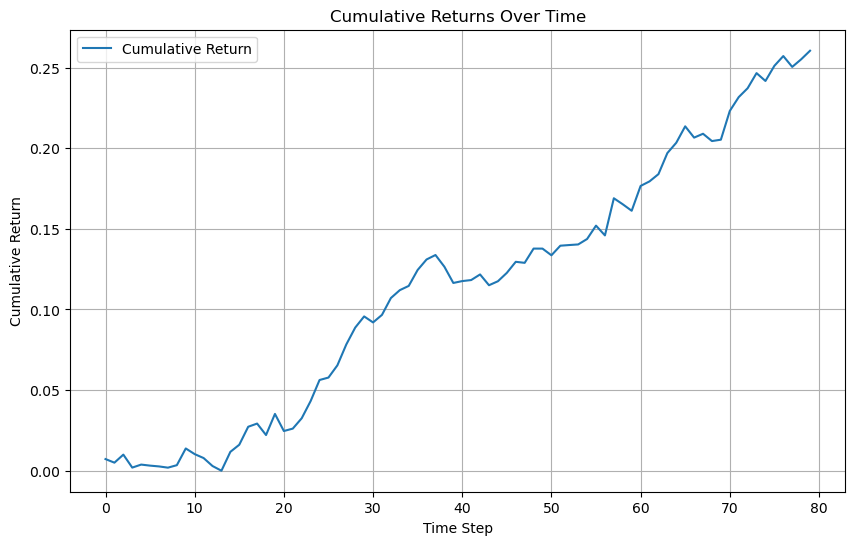

In [94]:
import numpy as np
import matplotlib.pyplot as plt

# Example port_returns as a numpy array or pandas Series
# port_returns = np.array([...]) or pd.Series([...])
# Convert list to numpy array
port_returns_arr = np.array(port_returns)
# Calculate cumulative returns
cumulative_returns = np.cumprod(1 + port_returns_arr.flatten()) - 1  # flatten if 2D array

# Create a simple integer index for x-axis
time_index = np.arange(len(cumulative_returns))

# Plot cumulative returns against time index
plt.figure(figsize=(10,6))
plt.plot(time_index, cumulative_returns, label='Cumulative Return')
plt.xlabel('Time Step')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Returns Over Time')
plt.legend()
plt.grid(True)
plt.show()